# I066 Srihari Thyagarajan DL Lab 5

In [19]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models, layers, losses, metrics, regularizers
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint


## Hyper Parameter Tuning:

# Tasks:
### 1: Import the IMDB data from keras


In [3]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 32s 2us/step


#### Basic EDA of the dataset:

In [5]:
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [6]:
train_data.shape

(25000,)

In [21]:
test_data.shape

(25000,)

In [22]:
test_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

### Task 2: Pre-processing and prepare the data for giving to the neural network.
#### a. Encoding the integer sequences into a binary matrix.


In [7]:
# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [24]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [25]:
print(x_train.shape, " & ", x_test.shape)

(25000, 10000)  &  (25000, 10000)


#### b. Split it into train and test. (In this case we're taking 10k for training and 10k for testing).

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [33]:
print(x_val, " ", partial_x_train, " ", y_val, " ", partial_y_train, " ")

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]   [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]   [1 0 0 ... 1 0 0]   [0 0 0 ... 0 1 0]  


In [29]:
y_train[0]

1.0

In [32]:
print(y_train.shape, " & ", y_test.shape)

(25000,)  &  (25000,)


#### c. Set aside validation data from the training set.

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Task 3: Building the sequential neural network model.
#### a. You may choose the layers.

In [34]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### b. Use appropriate activation and loss functions.

In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Task 4: Compile and fit the model to the training dataset. Use validation also.

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 3s 65ms/step - loss: 0.5467 - accuracy: 0.7438 - val_loss: 0.3879 - val_accuracy: 0.8681
Epoch 2/10
30/30 [==============================] - 1s 23ms/step - loss: 0.2799 - accuracy: 0.9103 - val_loss: 0.2870 - val_accuracy: 0.8883
Epoch 3/10
30/30 [==============================] - 1s 22ms/step - loss: 0.1768 - accuracy: 0.9439 - val_loss: 0.2812 - val_accuracy: 0.8866
Epoch 4/10
30/30 [==============================] - 1s 22ms/step - loss: 0.1211 - accuracy: 0.9649 - val_loss: 0.3074 - val_accuracy: 0.8817
Epoch 5/10
30/30 [==============================] - 1s 24ms/step - loss: 0.0858 - accuracy: 0.9784 - val_loss: 0.3266 - val_accuracy: 0.8798
Epoch 6/10
30/30 [==============================] - 1s 22ms/step - loss: 0.0582 - accuracy: 0.9893 - val_loss: 0.3612 - val_accuracy: 0.8803
Epoch 7/10
30/30 [==============================] - 1s 22ms/step - loss: 0.0401 - accuracy: 0.9942 - val_loss: 0.4014 - val_accuracy: 0.8765
Epoch 8/10
30

### Task 5: Plot training and validation loss.


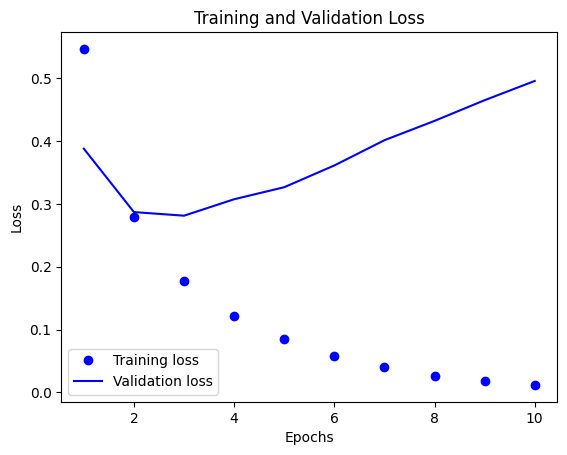

In [37]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Task 6: Use regularizes to improve the performance.

In [38]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

### Task 7: Record the best performance.

In [40]:
# Re-compile the model before training
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val), # Using validation set here.
                    callbacks=[checkpoint])

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.1618 - accuracy: 0.9570 - val_loss: 0.3150 - val_accuracy: 0.8895
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1403 - accuracy: 0.9642 - val_loss: 0.3392 - val_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1284 - accuracy: 0.9677 - val_loss: 0.3744 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1149 - accuracy: 0.9691 - val_loss: 0.3891 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1035 - accuracy: 0.9749 - val_loss: 0.4145 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0923 - accuracy: 0.9769 - val_loss: 0.4382 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0894 - accuracy: 0.9768 - val_loss: 0.4811 - val_accuracy: 0.8813
Epoch 8/20
30

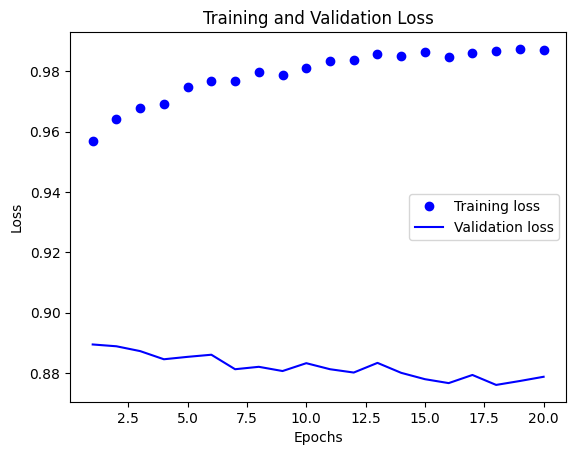

In [46]:
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_values, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [58]:
model_1 = models.Sequential()
model_1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))

In [59]:
# Re-compile the model before training
model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True)

history = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val), # Using validation set here.
                    callbacks=[checkpoint])

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.6005 - accuracy: 0.7773 - val_loss: 0.4819 - val_accuracy: 0.8575
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4062 - accuracy: 0.8858 - val_loss: 0.4202 - val_accuracy: 0.8491
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3226 - accuracy: 0.9077 - val_loss: 0.3675 - val_accuracy: 0.8675
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2756 - accuracy: 0.9235 - val_loss: 0.3307 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2495 - accuracy: 0.9327 - val_loss: 0.3659 - val_accuracy: 0.8727
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2289 - accuracy: 0.9413 - val_loss: 0.3710 - val_accuracy: 0.8709
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2143 - accuracy: 0.9469 - val_loss: 0.3402 - val_accuracy: 0.8855
Epoch 8/20
30

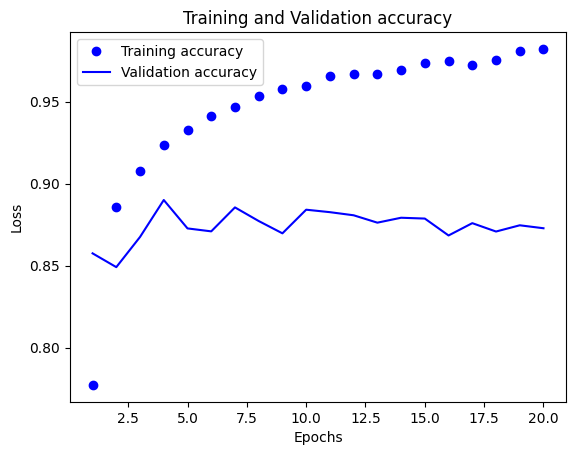

In [60]:
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_values, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [61]:
model_2 = models.Sequential()
model_2.add(layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

In [62]:
# Re-compile the model before training
model_2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True)

history = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val), # Using validation set here.
                    callbacks=[checkpoint])

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 1.1405 - accuracy: 0.7671 - val_loss: 0.7383 - val_accuracy: 0.7857
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.6789 - accuracy: 0.8352 - val_loss: 0.6675 - val_accuracy: 0.8278
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6236 - accuracy: 0.8513 - val_loss: 0.6229 - val_accuracy: 0.8485
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5933 - accuracy: 0.8597 - val_loss: 0.5934 - val_accuracy: 0.8573
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5689 - accuracy: 0.8625 - val_loss: 0.5742 - val_accuracy: 0.8603
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5545 - accuracy: 0.8641 - val_loss: 0.6283 - val_accuracy: 0.8223
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.5491 - accuracy: 0.8668 - val_loss: 0.5554 - val_accuracy: 0.8669
Epoch 8/20
30

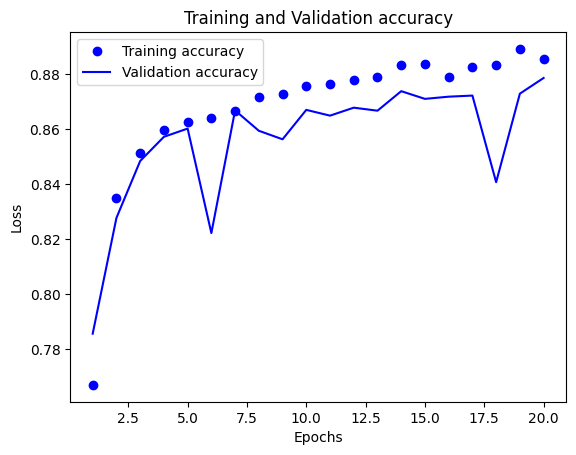

In [63]:
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_values, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


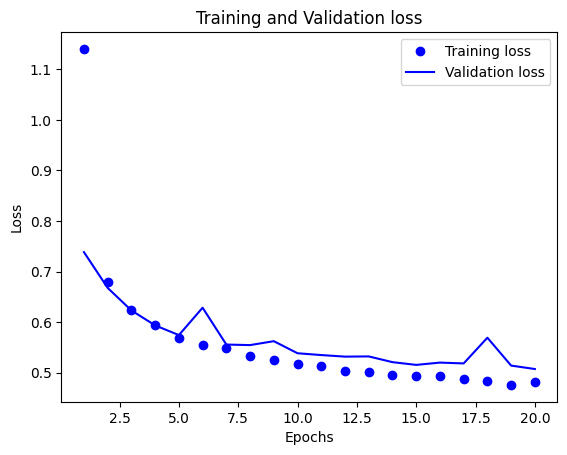

In [64]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
